In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
import tensorflow as tf
tf.test.is_gpu_available()
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.test.gpu_device_name()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12520511599002322864
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15862523495
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6141189796564254642
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:0d:00.0, compute capability: 6.0"
]


'/device:GPU:0'

In [3]:
import sys
# Add the tf_unet folder path to the sys.path list
sys.path.append('/data3/floraxue/cs282a/SegmentNet/')


In [4]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util, image_util

In [5]:
#Data input
#put your data here
path_images = "/data3/floraxue/cs282a/data/dataset_1/trainval/A_phase_full/"
generator = image_util.ImageDataProvider(path_images+"*.tif")
#TODO: need to enhance the borders and rethink the matrix vs bkg 

Number of files used: 100
Number of channels: 1
Number of classes: 2


In [6]:
net = unet.Unet(channels=1, n_class=2, layers=3, features_root=16)

2019-05-04 10:42:35,573 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [7]:
trainer = unet.Trainer(net, batch_size=1, verification_batch_size = 1, 
                       optimizer="adam", opt_kwargs=dict(learning_rate = 0.0001))

In [8]:
path = trainer.train(generator, "./unet_A_full", training_iters=100, epochs=3, display_step=40)

2019-05-04 10:42:42,429 Removing '/data3/floraxue/cs282a/SegmentNet/A_net/prediction'
2019-05-04 10:42:42,433 Removing '/data3/floraxue/cs282a/SegmentNet/A_net/unet_A_full'
2019-05-04 10:42:42,436 Allocating '/data3/floraxue/cs282a/SegmentNet/A_net/prediction'
2019-05-04 10:42:42,438 Allocating '/data3/floraxue/cs282a/SegmentNet/A_net/unet_A_full'
2019-05-04 10:42:48,589 Verification error= 72.6%, loss= 0.7024
2019-05-04 10:42:51,390 Start optimization
2019-05-04 10:43:01,808 Iter 0, Minibatch Loss= 0.7002, Training Accuracy= 0.3018, Minibatch error= 69.8%
2019-05-04 10:44:06,333 Iter 40, Minibatch Loss= 0.6912, Training Accuracy= 0.4567, Minibatch error= 54.3%
2019-05-04 10:45:07,854 Iter 80, Minibatch Loss= 0.6748, Training Accuracy= 0.7037, Minibatch error= 29.6%
2019-05-04 10:45:35,145 Epoch 0, Average loss: 0.6820, learning rate: 0.0001
2019-05-04 10:45:36,137 Verification error= 4.4%, loss= 0.6426
2019-05-04 10:46:08,322 Iter 120, Minibatch Loss= 0.6045, Training Accuracy= 0.9012

In [ ]:
model_file = root_folder+"models/transformer_summarizer"
with tf.Session() as sess:
    model.saver.restore(sess, path)

In [23]:
x_test, y_test = generator(20)

In [24]:
prediction = net.predict(path, x_test)

INFO:tensorflow:Restoring parameters from ./unet_A/model.ckpt


2019-05-02 23:22:33,368 Restoring parameters from ./unet_A/model.ckpt
2019-05-02 23:22:33,521 Model restored from file: ./unet_A/model.ckpt


In [25]:
x_test.shape

(20, 256, 256, 1)

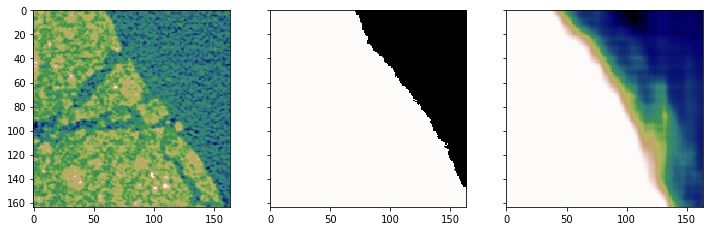

In [40]:
i = 12
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[i,:,:,0])
ax[1].imshow(y_test[i,:,:,0])
ax[2].imshow(prediction[i,:,:,0])

In [41]:
prediction[i,:,:,0]

array([[1.        , 1.        , 1.        , ..., 0.04273855, 0.04300196,
        0.04160478],
       [1.        , 1.        , 1.        , ..., 0.04255624, 0.04223042,
        0.04132844],
       [1.        , 1.        , 1.        , ..., 0.04297445, 0.04289516,
        0.04163992],
       ...,
       [1.        , 1.        , 1.        , ..., 0.13304834, 0.13986944,
        0.14671001],
       [1.        , 1.        , 1.        , ..., 0.13003269, 0.1364251 ,
        0.14148535],
       [1.        , 1.        , 1.        , ..., 0.12782192, 0.13369316,
        0.13795006]], dtype=float32)

In [42]:
y_test[i,:,:,0]

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [ ]:
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")